## PCA

- 一种非监督学习的机器学习算法
- 主要用于降维
- 通过降维,能够发现便于人类理解的特征
- 其他应用:可视化,降噪

### 主成分分析原理

1. 目的:找到一个轴的方向,使得样本空间映射到这个轴后,距离最大. 表示样本各个点的距离,我们使用方差表示.
2. 将所有样本进行demean处理,目的是约去方差中的X均值

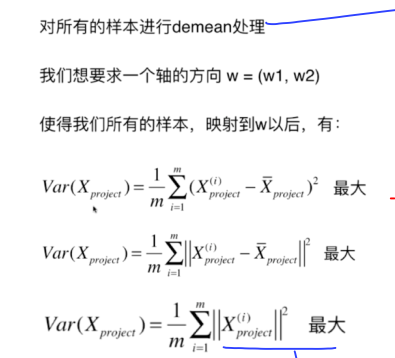

3.建立样本原有方向,与轴方向的关系
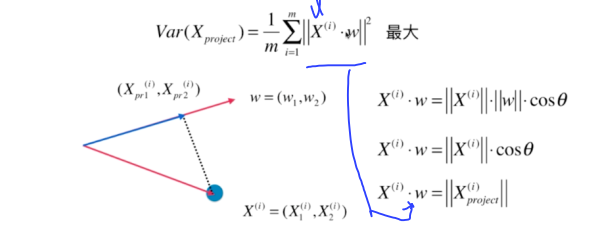

4.获得目标函数
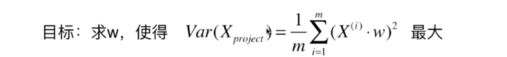

5.使用梯度上升法,求取最大值

求出目标函数梯度
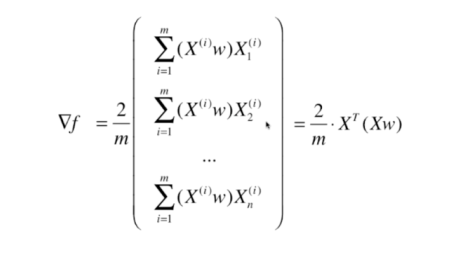

###  PCA与MSE的区别
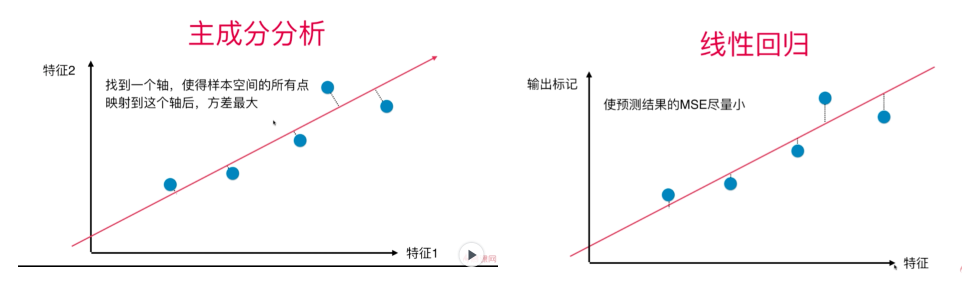

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.empty((100,2))
X[:,0] = np.random.uniform(0.,100.,size = 100)
# 生成 0~100 的随机浮点数. 随机分布
X[:,1] = 0.75 * X[:,0] +3. + np.random.normal(0,10.,size = 100)

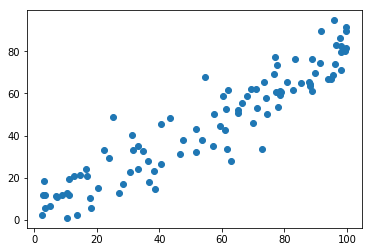

In [3]:
plt.scatter(X[:,0],X[:,1])
plt.show()

### demean

In [4]:
def demean(X):
	# 减去平均值,平均值应该每个维度下的平均值.
	return  X - np.mean(X,axis = 0)

In [5]:
X_demean = demean(X)

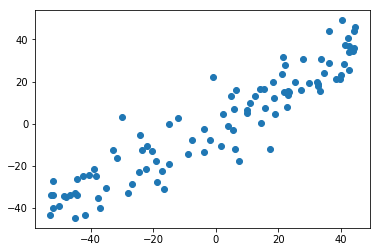

In [6]:
plt.scatter(X_demean[:,0],X_demean[:,1])
plt.show()

## 梯度上升法

In [7]:
def f(w,X):
# 这一步向量化,还是不太明白.
    return np.sum((X.dot(w)**2))/len(X)

In [8]:
def df_math(w,X):
    return X.T.dot(X.dot(w))*2. /len(X)

In [9]:
def df_debug(w,X,epsilon = 0.0001):
	res = np.empty(len(w))
	for i in range(len(w)):
		w_1 = w.copy()
		w_1[i] += epsilon
		w_2  = w.copy()
		w_2[i] -= epsilon
		res[i] = (f(w_1,X) - f(w_2,X))/(2*epsilon)
	return res

In [37]:
def derection(w):
    return w / np.linalg.norm(w)

def gradient_ascent(df,X,initial_w,eta,n_iters = 1e4,epsilon = 1e-8):
    
	w = derection(initial_w)
	c_iters = 0

	while c_iters < n_iters:
		gradient = df(w,X)
		last_w = w
        # 注意点1:此处的w为方向向量,应该做处理.
		w = w + eta * gradient
		w = derection(w)
		if (abs(f(w,X) -f(last_w,X)) < epsilon):
			break

		c_iters += 1


	return w

In [38]:
##注意点2 w初始值不能为0,因为0为f(x)的最小值,而我们要求最大值.
initial_w = np.random.random(size = X.shape[1])
initial_w

array([ 0.61947709,  0.98678185])

In [39]:
## 注意点3,不能使用standardscaler,因为standardscaler会打掉方差

In [40]:
eta = 0.001

In [41]:
gradient_ascent(df_math,X_demean,initial_w,eta)

array([ 0.78345522,  0.62144824])

In [42]:
w = gradient_ascent(df_debug,X_demean,initial_w,eta)

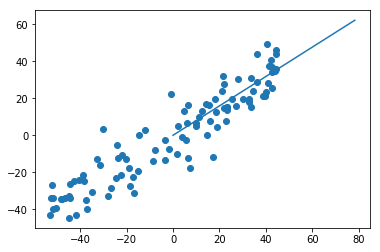

In [43]:
plt.scatter(X_demean[:,0],X_demean[:,1])
plt.plot([0,w[0]*100],[0,w[1]*100])
plt.show()

### 当没有噪音的时候

In [44]:
X2 = np.empty((100,2))
X2[:,0] = np.random.uniform(0.,100.,size = 100)
# 生成 0~100 的随机浮点数. 随机分布
X2[:,1] = 0.75 * X2[:,0] +3.

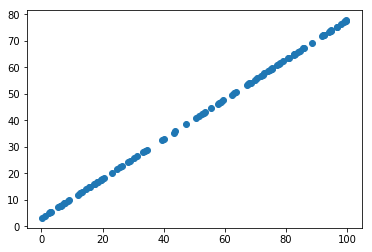

In [45]:
plt.scatter(X2[:,0],X2[:,1])
plt.show()


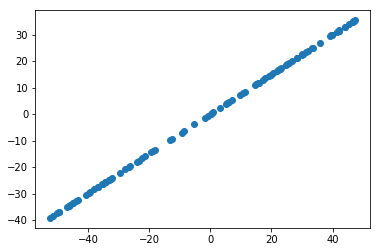

In [46]:
X2_demean = demean(X2)
plt.scatter(X2_demean[:,0],X2_demean[:,1])
plt.show()

In [47]:
gradient_ascent(df_math,X2_demean,initial_w,eta)

array([ 0.79999985,  0.6000002 ])

In [51]:
w2= gradient_ascent(df_debug,X2_demean,initial_w,eta)

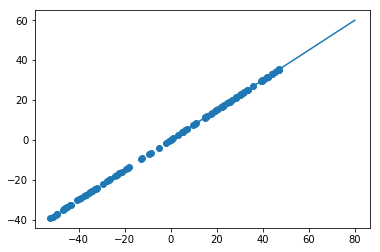

In [52]:
plt.scatter(X2_demean[:,0],X2_demean[:,1])
plt.plot([0,w2[0]*100],[0,w2[1]*100])
plt.show()